In [12]:
import numpy as np
import cv2
import cPickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.figure
from matplotlib import mlab
import os
import json
import sys 

In [13]:
popularFile = "../Logs/faceCounts.pk"
unpopularFile = "../Logs/unpopularFaceCounts.pk"


In [53]:
def readFaceCounts(fileName):
    lists = []
    infile = open(fileName, 'rb')
    while True:
        try:
            lists.append(pickle.load(infile))
        except EOFError:
            infile.close()
            break
    return lists

def removeDuplicatesAndSplit(lines):
    posts = []
    totFrames = []
    faceFrames = []
    profiles = []
    frontals = []
    for l in lines:
        postId = l.split(',')[0]
        if postId not in posts:
            comps = l.split(',')
            if int(comps[1]) == 0:
                break
            else:
                posts.append(postId)
                totFrames.append(int(comps[1]))
                faceFrames.append(int(comps[2]))
                profiles.append(int(comps[3]))
                frontals.append(int(comps[3]))
    return totFrames, faceFrames
            

In [71]:
Lines = readFaceCounts(popularFile)
print len(popLines)


16316


In [55]:
unpopLines = readFaceCounts(unpopularFile)
print len(unpopLines)

3000


In [72]:
samples = np.random.choice(len(Lines) , len(unpopLines))

In [74]:
popLines = [Lines[i] for i in samples]

In [75]:
popTotFrames , popFaceFrames = removeDuplicatesAndSplit(popLines)
facePercentages = np.zeros((len(popTotFrames),1))
for i in range(len(facePercentages)):
    facePercentages[i] = float(float(popFaceFrames[i])/float(popTotFrames[i]))

In [76]:
unpopTotFrames , unpopFaceFrames = removeDuplicatesAndSplit(unpopLines)


In [77]:
unpopfacePercentages = np.zeros((len(unpopTotFrames),1))
for i in range(len(unpopfacePercentages)):
    unpopfacePercentages[i] = float(float(unpopFaceFrames[i])/float(unpopTotFrames[i]))

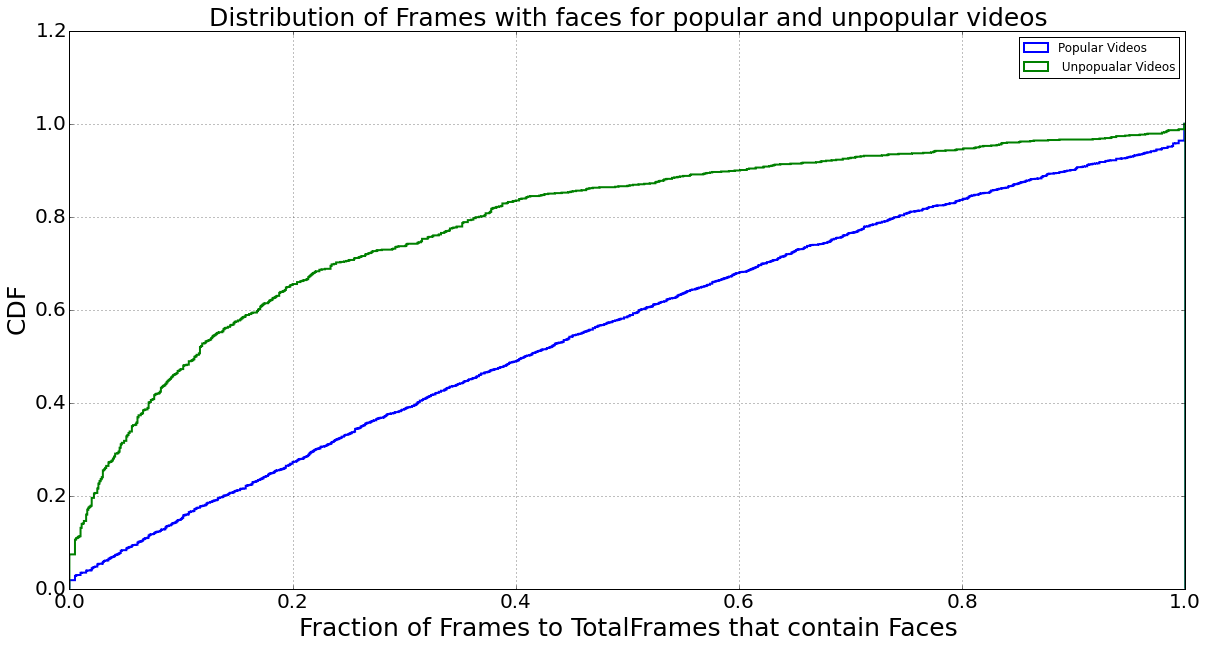

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.hist(facePercentages , 1000 , normed =1 , histtype='step' , cumulative=True ,linewidth = 2.0)
plt.hist(unpopfacePercentages , 1000 , normed =1 , histtype='step' , cumulative=True ,linewidth = 2.0)
plt.title("Distribution of Frames with faces for popular and unpopular videos",fontsize = 25)
plt.xlabel("Fraction of Frames to TotalFrames that contain Faces",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Popular Videos', ' Unpopualar Videos'])
plt.grid(True)
plt.show()


In [79]:
print np.mean(facePercentages) , np.median(facePercentages) , np.mean(unpopfacePercentages) , np.median(unpopfacePercentages)

0.44344148263 0.40932642487 0.21188256485 0.113784568518


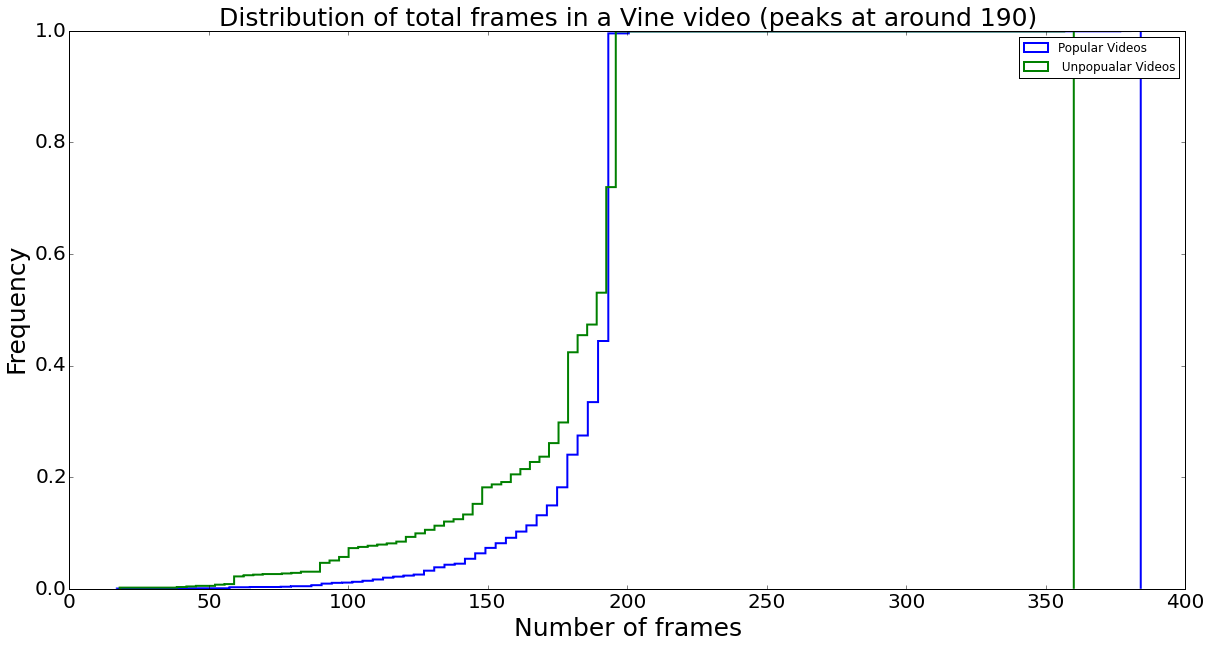

In [85]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.hist(popTotFrames , 100 , normed =1 , histtype='step' , cumulative=True ,linewidth = 2.0)
plt.hist(unpopTotFrames , 100 , normed =1 , histtype='step' , cumulative=True ,linewidth = 2.0)
plt.title("Distribution of total frames in a Vine video (peaks at around 190)",fontsize = 25)
plt.legend(['Popular Videos', ' Unpopualar Videos'])
plt.xlabel("Number of frames",fontsize = 25)
plt.ylabel("Frequency",fontsize = 25)
plt.show()


In [81]:
print np.mean(popTotFrames) , np.median(popTotFrames) , np.mean(unpopTotFrames) , np.median(unpopTotFrames)

185.46774942 194.0 175.324524313 192.0


In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(frontalPercentages, 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0,linestyle='dashed')
plt.hist(profilePercentages, 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.hist(facePercentages, 1000, normed=1,histtype='step', cumulative=True, linewidth = 3.0,linestyle='dotted')
plt.title("CDF for Face to Frame ratio across  Vine dataset", fontsize = 25)
plt.xlabel("Ratio of Face frames to Total frames",fontsize = 25)
plt.ylabel("Probability",fontsize = 25)
plt.legend(['Frontal Faces', 'Profile/Sideways Faces' , 'Max of both'])
plt.show()


In [ ]:
print np.mean(facePercentages)
print np.median(facePercentages)
print np.var(facePercentages)
print np.mean(frontalPercentages)
print np.median(frontalPercentages)
print np.var(frontalPercentages)
print np.mean(profilePercentages)
print np.median(profilePercentages)
print np.var(profilePercentages)

In [ ]:

def getVisited():
    visited = []
    f = open(visitedList, 'rb')
    visited = pickle.load(f)
    return visited


def walkLevel1Dir(root):
    count = 0
    dirList = []
    filesList = []
    for path, dirs, files in os.walk(root):
        if count > 0:
            return dirList , fileList
        dirList = dirs
        fileList = files
        count = count + 1


def getPopularFile(rootDir):
    f = open(rootDir + '/popular.json' ,'r')
    data = json.load(f)
    return data

    
    
def getPopularPosts(popular , loopThreshold):
    records = popular['data']['records']
    posts=[]
    for i in range (0 , len(records)):
        loopCount = records[i]['reposts']['count']
        if(loopCount > loopThreshold):
            posts.append(records[i])
    return posts

def getRecords(popular):
    records = popular['data']['records']
    return records

In [ ]:
root = "../vinedata/Data/"
dirs,files = walkLevel1Dir(root)
visited = getVisited()
selectedPosts = []
allPosts = []


for d in dirs:
    if d in visited:
        dataRoot = root + d
        print "Visiting: " + dataRoot
        popular = getPopularFile(dataRoot)
        popposts = getPopularPosts(popular , 1000)
        selectedPosts += popposts
        rec = getRecords(popular)
        allPosts += rec
        #


In [ ]:
print len(selectedPosts)
print len(allPosts)

In [ ]:
selectedIDs = np.zeros((len(selectedPosts),1),dtype='i8')
for i in range(len(selectedPosts)):
    selectedIDs[i] = int(selectedPosts[i]['postId'])

In [ ]:
likeCount = np.zeros((len(allPosts),1))
repostCount = np.zeros((len(allPosts),1))
for i in range(len(allPosts)):
    likeCount[i] = allPosts[i]['likes']['count']
    repostCount[i] = allPosts[i]['reposts']['count']


In [ ]:
print likeCount.shape

In [ ]:
#test = np.random.gamma(0.1, 5, 1000)
test = np.random.exponential(0.15, 6541)
test = test * 30000

In [ ]:
print test [999]
print test.max() , test.min()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(test , 1000 , normed =1 , histtype='step' , cumulative=True , linewidth = 3.0,)
plt.hist(repostCount , 1000 , normed =1 , histtype='step' , cumulative=True , linewidth = 3.0,linestyle='dashed')
plt.hist(likeCount , 1000 , normed =1 , histtype='step' , cumulative=True, linewidth = 3.0)
plt.xticks(np.arange(0, max(likeCount), 10000))
plt.title("CDFs for all collected Vines" , fontsize = 25)
plt.xlabel("Count (Reposts , Likes)" , fontsize = 25)
plt.ylabel("Probability", fontsize = 25)
plt.legend(['exponential','Repost Count', 'Like Count'] , fontsize = 15)
plt.show()

print np.mean(likeCount)
print np.median(likeCount)
print np.mean(repostCount)
print np.median(repostCount)

In [ ]:
intersection = np.in1d(selectedIDs, PostID )
# indices = []
# for p in selectedPosts:
#     for i in range(len(posts)):
#         if p['postId'] in posts:
#             indices.append(posts.index(p['postId']))
#             break

indices = []
for i in range(len(intersection)):
    if(intersection[i]):
        indices.append(i)

#print indices

In [ ]:
print len(selectedPosts)
print len(indices)
print PostID.shape
print selectedIDs.shape

In [ ]:

selPercentages = np.zeros((len(indices),1))
selFrontalPercentages = np.zeros((len(indices),1))
selProfilePercentages = np.zeros((len(indices),1))

for i in range(len(indices)):
    selPercentages[i] = facePercentages[i]
    selProfilePercentages[i] = float(profileFrames[i])/float(totFrames[indices[i]])
    selFrontalPercentages[i] = float(faceFrames[i])/float(totFrames[indices[i]])

selRepost = np.zeros((len(indices),1))
selLikes = np.zeros((len(indices),1))

for i in range(len(indices)):
    selRepost[i] = allPosts[indices[i]]['reposts']['count']
    selLikes[i] = allPosts[indices[i]]['likes']['count']

In [ ]:
print min(selRepost)
print min(selLikes)


In [ ]:
likesNormed = selLikes / selLikes.max(axis=0)
repostNormed = selRepost / selRepost.max(axis=0)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
#plt.plot(likesNormed , selPercentages,'*g' )
plt.plot(selRepost , selPercentages , '^r' )

plt.xlabel('Number of Likes/Reposts Normalized',fontsize = 25)
plt.ylabel('Face to Frames ratio', fontsize = 25)
plt.legend(['Repost Count'])
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(selPercentages , 100 , normed =1 , histtype='step' , cumulative=False)
plt.title("Distribution of Face/Total Frames ratio across vines with 5k+ reposts")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.show()


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
hist1 = plt.hist(selPercentages, 1000, normed=1,histtype='step', cumulative=True ,color='r')
hist2 = plt.hist(facePercentages, 1000, normed=1,histtype='step', cumulative=True , color='b')


plt.title("CDF face frames to total frame ratio for Vines")
plt.xlabel("Ratio of Face frames to total frames")
plt.ylabel("Probability")
plt.legend(['Posts with more than 5K reposts', 'Across all posts'])
plt.show()

In [ ]:
print np.mean(selPercentages)
print np.median(selPercentages)
print np.var(selPercentages)